In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 1. Left Riemann Sum: sample at the LEFT endpoint of each interval
def left_riemann(f, a, b, n):
    h = (b - a) / n                                # width of each small interval
    x = np.linspace(a, b - h, n)                   # left endpoints
    return h * np.sum(f(x))                        # sum of rectangle areas

In [4]:
# 2. Right Riemann Sum: sample at the RIGHT endpoint of each interval
def right_riemann(f, a, b, n):
    h = (b - a) / n
    x = np.linspace(a + h, b, n)                   # right endpoints
    return h * np.sum(f(x))


In [5]:
# 3. Midpoint Rule: sample at midpoint of each interval → much more accurate
def midpoint_rule(f, a, b, n):
    h = (b - a) / n
    x = np.linspace(a + h/2, b - h/2, n)           # midpoints
    return h * np.sum(f(x))

In [6]:
# 4. Trapezoidal Rule: approximates each interval with a trapezoid
def trapezoidal_rule(f, a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n+1)                     # include endpoints
    # area = h * [ (f(a)+f(b))/2 + f(x1)+f(x2)+...+f(x_{n-1}) ]
    return h * (0.5*f(a) + 0.5*f(b) + np.sum(f(x[1:-1])))

In [7]:
# 5. Composite Simpson’s Rule (n must be even)
#    Most accurate among these, uses quadratic fitting.
def simpson_composite(f, a, b, n):
    if n % 2 != 0:                                 # ensure even n
        n += 1

    h = (b - a) / n
    x = np.linspace(a, b, n+1)

    odd = np.sum(f(x[1:n:2]))                      # f(x1), f(x3), ...
    even = np.sum(f(x[2:n:2]))                     # f(x2), f(x4), ...

    # Simpson formula:
    # (h/3)*(f(a) + f(b) + 4*odd_terms + 2*even_terms)
    return (h/3) * (f(a) + f(b) + 4*odd + 2*even)

In [8]:
# ---------------------------------------------------------------
# FUNCTION & EXACT INTEGRAL VALUE
# ---------------------------------------------------------------

f = lambda x: x**2                                 # we integrate x^2
a, b = 0, 1
I_exact = 1/3                                      # integral of x^2 from 0→1 = 1/3


In [9]:
# ---------------------------------------------------------------
# COMPUTE ERRORS FOR MULTIPLE n
# ---------------------------------------------------------------

ns = np.array([2, 4, 8, 16, 32, 64, 128, 256])     # test sizes

errors_left = []
errors_right = []
errors_mid = []
errors_trap = []
errors_simp = []

for n in ns:
    errors_left.append(abs(left_riemann(f, a, b, n) - I_exact))
    errors_right.append(abs(right_riemann(f, a, b, n) - I_exact))
    errors_mid.append(abs(midpoint_rule(f, a, b, n) - I_exact))
    errors_trap.append(abs(trapezoidal_rule(f, a, b, n) - I_exact))
    errors_simp.append(abs(simpson_composite(f, a, b, n) - I_exact))


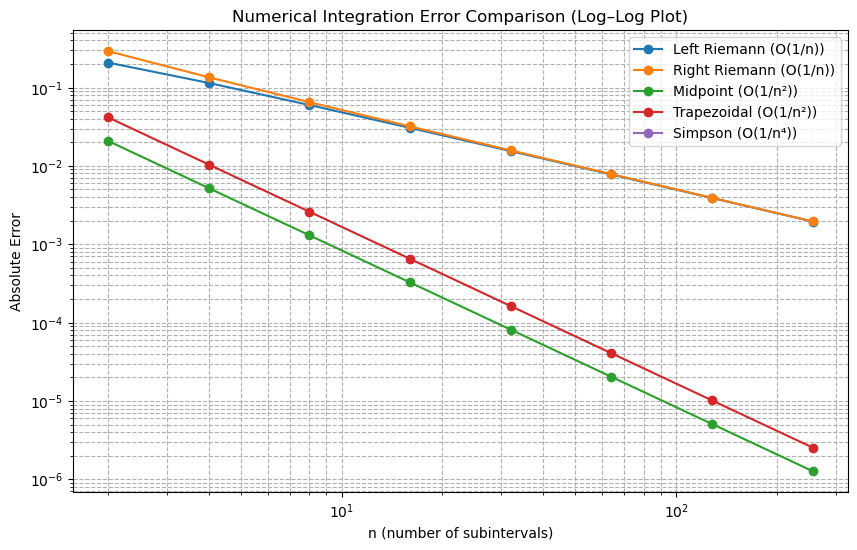

In [10]:
# ---------------------------------------------------------------
# PLOT ERROR COMPARISON (LOG–LOG SCALE)
# ---------------------------------------------------------------

plt.figure(figsize=(10, 6))

# Draw each integration error curve
plt.loglog(ns, errors_left, 'o-', label='Left Riemann (O(1/n))')
plt.loglog(ns, errors_right, 'o-', label='Right Riemann (O(1/n))')
plt.loglog(ns, errors_mid, 'o-', label='Midpoint (O(1/n²))')
plt.loglog(ns, errors_trap, 'o-', label='Trapezoidal (O(1/n²))')
plt.loglog(ns, errors_simp, 'o-', label='Simpson (O(1/n⁴))')

# Labels & title
plt.xlabel("n (number of subintervals)")
plt.ylabel("Absolute Error")
plt.title("Numerical Integration Error Comparison (Log–Log Plot)")

plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()
